The goal here is to load the exgalm5 data for all the 6-bands and restructure them so that we have the median depths for all the filters in one file. Before that, I test whether the saved i-band depth matches that from the OSWG summary excel sheet.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
%matplotlib inline

In [2]:
import time
import copy
import numpy as np
import healpy as hp
import os

%matplotlib inline

In [3]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [4]:
path = '/global/cscratch1/sd/awan/lsst_output/post_wp_output_v1.4_-0.1cuts/exgalm5_data/summary_data/'
os.listdir(path)

['median-depth_u-band_eg-pixels_y10_limi25.9_nside256.csv',
 'median-depth_y-band_eg-pixels_y10_limi25.9_nside256.csv',
 'median-depth_z-band_eg-pixels_y10_limi25.9_nside256.csv',
 'median-depth_g-band_eg-pixels_y10_limi25.9_nside256.csv',
 'median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv',
 'median-depth_r-band_eg-pixels_y10_limi25.9_nside256.csv']

In [5]:
outdir = 'paper-data/exgalm5-related/'
os.makedirs(outdir, exist_ok=True)

##### read in just the i-band data first

In [6]:
fname = 'median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv'
new = pd.read_csv('%s/%s' % (path, fname))

In [7]:
new

,dbname,Area (deg2),i-band depth: median,i-band depth: std
0,short_exp_2ns_1expt_v1.4_10yrs,15095.80,26.30,0.13
1,footprint_bluer_footprintv1.4_10yrs,14400.18,26.19,0.12
2,pair_strategy_0_v1.4_10yrs,15138.55,26.30,0.13
3,wfd_depth_scale0.95_noddf_v1.4_10yrs,15242.99,26.38,0.14
4,bulges_i_heavy_v1.4_10yrs,16635.43,26.21,0.13
...,...,...,...,...
70,wfd_depth_scale0.85_noddf_v1.4_10yrs,15346.90,26.33,0.13
71,pair_strategy_3_v1.4_10yrs,15132.20,26.30,0.13
72,footprint_add_mag_cloudsv1.4_10yrs,15236.38,26.29,0.13
73,wfd_depth_scale0.85_v1.4_10yrs,15146.16,26.26,0.12


##### read in the summary data 

In [8]:
summary_data = pd.read_csv('all_metrics.csv')

In [9]:
summary_data

,Unnamed: 0,group,kn_GW170817_counts,kn_GW170817_error,kn_Maf_Mean_Counts,kn_Pop_kNe_counts,kn_Pop_kNe_error,static_median Y1 $i$-band coadded depth in effective survey area,static_median Y10 $i$-band coadded depth in effective survey area,static_median Y3 $i$-band coadded depth in effective survey area,...,sl_num_lensed_SNe_Ia_in_specific_galaxy_clusters,sl_std_num_lensed_SNe_Ia_in_specific_galaxy_clusters,sn_faint_nsn_tot,sn_faint_zmax,sn_normal_nsn_tot,sn_faint_snr_rate,sn_faint_zlim_z,sn_normal_zmax,wl_fom,wl_systematics
0,DISPLAY_NAME,NaN,GW170817-like kNe Counts 10yrs,<- PLOT ONLY WITH COUNTS,kNe MAF Mean Counts,kN Population Counts 10yrs,<- PLOT ONLY WITH COUNTS,median Y1 $i$-band coadded depth in effective ...,median Y10 $i$-band coadded depth in effective...,median Y3 $i$-band coadded depth in effective ...,...,Number of strongly lensed SNe Ia in specific l...,Uncertainty in number of strongly lensed SNe I...,NaN,NaN,NaN,NaN,NaN,NaN,3x2pt statistical Figure of Merit,"Average visits metric, higher numbers are bett..."
1,agnddf_v1.4_10yrs.db,AGN_DDF,99.4,9.969954864,32.79222058,37.2,6.099180273,25.1,26.31,25.71,...,0.74,0.44,48084.0,0.18,165998.0,0.5000,0.5703,0.28,413.335569,207.2954857
2,alt_roll_mod2_dust_sdf_0.20_v1.4_10yrs.db,alt_roll_dust,88.4,9.402127419,24.60041667,31.6,5.621387729,25,26.19,25.54,...,0.58,0.34,41133.0,0.17,129800.0,0.4932,0.5551,0.27,402.3484159,183.3582387
3,baseline_2snapsv1.4_10yrs.db,baseline,86.2,9.284395511,27.57775591,31.8,5.639148872,25.04,26.25,25.65,...,0.74,0.44,37355.0,0.17,123964.0,0.4970,0.5741,0.27,398.9505941,182.114015
4,baseline_v1.4_10yrs.db,baseline,90.8,9.5289034,30.63877953,37.2,6.099180273,25.09,26.29,25.69,...,0.63,0.39,45060.0,0.18,149129.0,0.5053,0.5667,0.27,405.4374071,197.3582785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,wfd_depth_scale0.90_v1.4_10yrs.db,wfd_depth,90.2,9.497368056,30.48179134,36.2,6.016643583,25.08,26.29,25.69,...,0.64,0.37,45119.0,0.18,148292.0,0.5000,0.5790,0.27,408.288733,197.7427692
75,wfd_depth_scale0.95_noddf_v1.4_10yrs.db,wfd_depth,116.8,10.80740487,36.25787402,41.8,6.46529195,25.17,26.38,25.78,...,0.82,0.48,57571.0,0.19,194469.0,0.5025,0.5874,0.30,424.0048686,229.371302
76,wfd_depth_scale0.95_v1.4_10yrs.db,wfd_depth,100.2,10.009995,31.6351551,33.6,5.796550698,25.09,26.31,25.71,...,0.81,0.47,50073.0,0.18,164054.0,0.5043,0.5727,0.29,413.0086211,206.8626655
77,wfd_depth_scale0.99_noddf_v1.4_10yrs.db,wfd_depth,124.4,11.15347479,36.93297191,46.8,6.841052551,25.18,26.4,25.79,...,0.81,0.47,63661.0,0.20,213407.0,0.5120,0.5814,0.31,425.8142911,237.6744272


#### compare the overlapping data between the two files

In [10]:
mapper = {'i-band depth: median': 'static_median Y10 $i$-band coadded depth in effective survey area', 
          'Area (deg2)': 'static_Y10 effective survey area',
          'i-band depth: std': 'static_stddev of Y10 $i$-band coadded depth in effective survey area'
         }

In [11]:
inds = []
for i, db in enumerate( new['dbname'] ):
    ind = np.where(summary_data['Unnamed: 0'] == '%s.db' % db)[0]
    inds.append(ind[0])
    for stat_key in mapper:
        val1 = new[stat_key].values[i]
        val2 = float(summary_data[mapper[stat_key]].values[ind][0])
        if val1 != val2:
            print('things dont match for %s: %s: %s vs. %s' % (db, stat_key, val1, val2))

In [12]:
new[stat_key].values

array([0.13, 0.12, 0.13, 0.14, 0.13, 0.13, 0.13, 0.13, 0.14, 0.13, 0.13,
       0.12, 0.15, 0.12, 0.14, 0.12, 0.12, 0.13, 0.13, 0.14, 0.13, 0.12,
       0.14, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.15, 0.13, 0.14, 0.12,
       0.15, 0.11, 0.11, 0.13, 0.12, 0.13, 0.12, 0.13, 0.13, 0.2 , 0.13,
       0.13, 0.13, 0.12, 0.13, 0.14, 0.12, 0.12, 0.13, 0.1 , 0.13, 0.12,
       0.13, 0.13, 0.11, 0.13, 0.12, 0.12, 0.11, 0.12, 0.13, 0.13, 0.13,
       0.13, 0.17, 0.14, 0.13, 0.13, 0.13, 0.13, 0.12, 0.13])

In [13]:
summary_data[mapper[stat_key]].values[inds].astype(float)

array([0.13, 0.12, 0.13, 0.14, 0.13, 0.13, 0.13, 0.13, 0.14, 0.13, 0.13,
       0.12, 0.15, 0.12, 0.14, 0.12, 0.12, 0.13, 0.13, 0.14, 0.13, 0.12,
       0.14, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.15, 0.13, 0.14, 0.12,
       0.15, 0.11, 0.11, 0.13, 0.12, 0.13, 0.12, 0.13, 0.13, 0.2 , 0.13,
       0.13, 0.13, 0.12, 0.13, 0.14, 0.12, 0.12, 0.13, 0.1 , 0.13, 0.12,
       0.13, 0.13, 0.11, 0.13, 0.12, 0.12, 0.11, 0.12, 0.13, 0.13, 0.13,
       0.13, 0.17, 0.14, 0.13, 0.13, 0.13, 0.13, 0.12, 0.13])

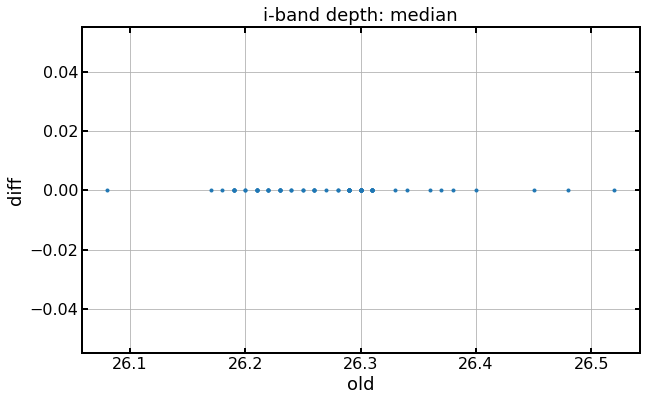

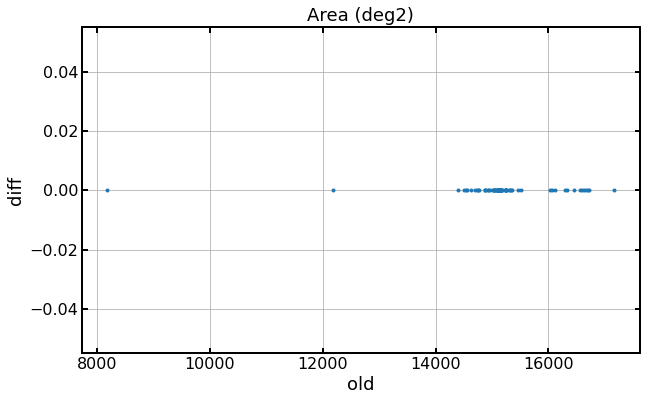

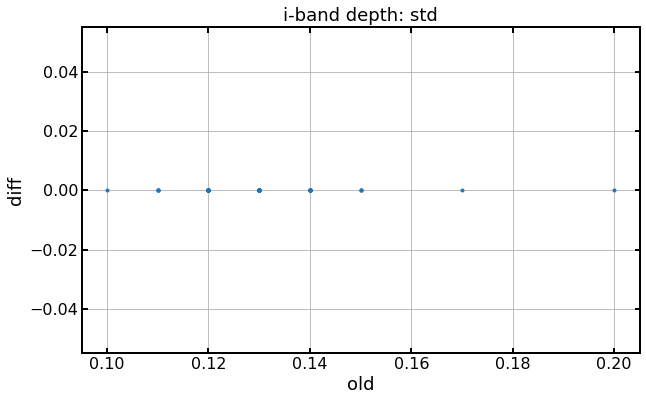

In [14]:
for stat_key in mapper:
    plt.clf()
    old = summary_data[mapper[stat_key]].values[inds].astype(float)
    plt.plot( old, new[stat_key].values - old, '.')
    plt.xlabel('old')
    plt.ylabel('diff')
    plt.title(stat_key)
    plt.show()

okay things match -- good. can proceed to saving things now.

#### assemble the data to save

In [15]:
bands = ['u', 'g', 'r', 'i', 'z', 'y']
yr_tag = 'y10'
ilim_tag = 'limi25.9'

data_to_save = pd.DataFrame()
for i, band in enumerate( bands ):
    fname = [f for f in os.listdir(path) if f.__contains__('_%s-band_' % band) \
                                             and f.__contains__('_%s_' % yr_tag) \
                                             and f.__contains__('_%s_' % ilim_tag)
            ][0]
    print('reading in %s' % fname)
    data_ = pd.read_csv('%s/%s' % (path, fname))
    
    band_key = '%s-band median coadded dust-corrected depth in eg-footprint' % band
    if i == 0:
        data_to_save['dbname'] = data_['dbname'].values
        data_to_save['yr'] = [yr_tag] * len( data_['dbname'].values )
        
    else:
        # check to ensure the db order is the same
        if  (data_to_save['dbname'] != data_['dbname'].values).any():
            raise ValueError('dbname order is different for %s-band vs. previous ones.' % band)
    
    data_to_save[band_key] = data_['%s-band depth: median' % band].values

reading in median-depth_u-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_g-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_r-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_z-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_y-band_eg-pixels_y10_limi25.9_nside256.csv


In [16]:
data_to_save

,dbname,yr,u-band median coadded dust-corrected depth in eg-footprint,g-band median coadded dust-corrected depth in eg-footprint,r-band median coadded dust-corrected depth in eg-footprint,i-band median coadded dust-corrected depth in eg-footprint,z-band median coadded dust-corrected depth in eg-footprint,y-band median coadded dust-corrected depth in eg-footprint
0,short_exp_2ns_1expt_v1.4_10yrs,y10,25.44,26.65,26.79,26.30,25.60,24.81
1,footprint_bluer_footprintv1.4_10yrs,y10,25.55,27.09,26.80,26.19,25.44,24.68
2,pair_strategy_0_v1.4_10yrs,y10,25.59,26.70,26.79,26.30,25.60,24.80
3,wfd_depth_scale0.95_noddf_v1.4_10yrs,y10,25.64,26.80,26.86,26.38,25.69,24.90
4,bulges_i_heavy_v1.4_10yrs,y10,25.52,26.64,26.71,26.21,25.53,24.74
...,...,...,...,...,...,...,...,...
70,wfd_depth_scale0.85_noddf_v1.4_10yrs,y10,25.63,26.75,26.81,26.33,25.64,24.85
71,pair_strategy_3_v1.4_10yrs,y10,25.58,26.73,26.78,26.30,25.60,24.80
72,footprint_add_mag_cloudsv1.4_10yrs,y10,25.55,26.71,26.78,26.29,25.60,24.81
73,wfd_depth_scale0.85_v1.4_10yrs,y10,25.57,26.70,26.76,26.26,25.58,24.79


#### plot things out to see


## saved plot_median-depths.png


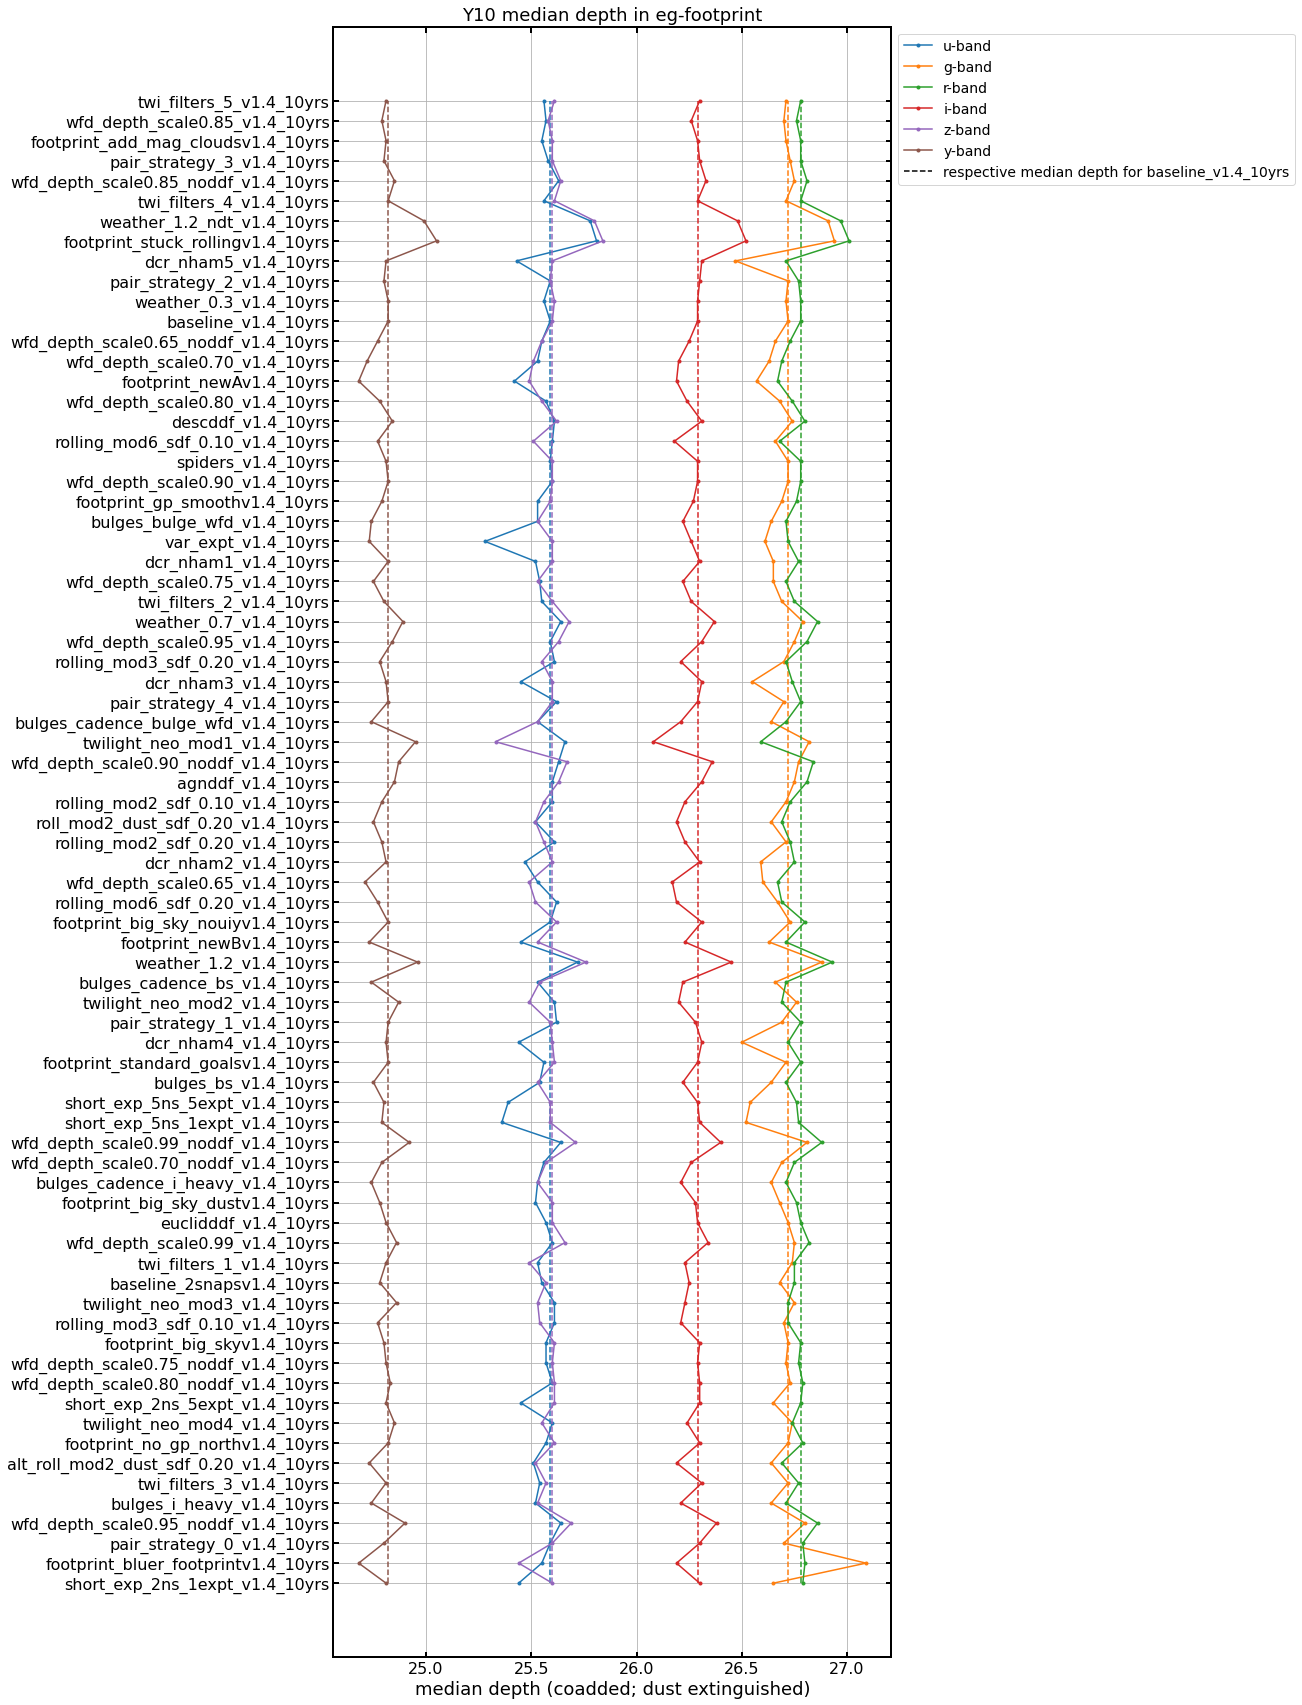

In [17]:
ndbs = len(data_to_save['dbname'].values)
baseline_ind = np.where( data_to_save['dbname'].values == 'baseline_v1.4_10yrs' )[0]

plt.clf()
for band in bands:
    band_key = '%s-band median coadded dust-corrected depth in eg-footprint' % band
    p = plt.plot(data_to_save[band_key].values, range(ndbs), '.-', label='%s-band' % band, )
    plt.plot( [ data_to_save[band_key].values[baseline_ind] ] * ndbs, range(ndbs), '--', color=p[0].get_color(), )
    
plt.plot( [data_to_save[band_key].values[baseline_ind]], [0], 'k--', label='respective median depth for baseline_v1.4_10yrs')

ax = plt.gca()
ax.set_yticks( range(ndbs) )
ax.set_yticklabels( data_to_save['dbname'].values )

plt.xlabel('median depth (coadded; dust extinguished)')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Y10 median depth in eg-footprint')
plt.gcf().set_size_inches(10, 30 )
fname = 'plot_median-depths.png'
plt.savefig('%s/%s' % (outdir, fname), bbox_inches='tight', format='png')
print('## saved %s' % fname)
plt.show()

#### save the data

In [18]:
fname = 'exgalm5-data_%sbands_%s_%s.csv' % (len(bands), yr_tag, ilim_tag)
data_to_save.to_csv('%s/%s' % (outdir, fname), index=False)

#### extra things

#### lets plot out the stddev in depth

In [19]:
data_to_consider = pd.DataFrame()
for i, band in enumerate( bands ):
    fname = [f for f in os.listdir(path) if f.__contains__('_%s-band_' % band) \
                                             and f.__contains__('_%s_' % yr_tag) \
                                             and f.__contains__('_%s_' % ilim_tag)
            ][0]
    print('reading in %s' % fname)
    data_ = pd.read_csv('%s/%s' % (path, fname))
    
    band_key = '%s-band stddev in coadded dust-corrected depth in eg-footprint' % band
    if i == 0:
        data_to_consider['dbname'] = data_['dbname'].values
        data_to_consider['yr'] = [yr_tag] * len( data_['dbname'].values )
        
    else:
        # check to ensure the db order is the same
        if  (data_to_consider['dbname'] != data_['dbname'].values).any():
            raise ValueError('dbname order is different for %s-band vs. previous ones.' % band)
    
    data_to_consider[band_key] = data_['%s-band depth: std' % band].values

reading in median-depth_u-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_g-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_r-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_z-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_y-band_eg-pixels_y10_limi25.9_nside256.csv


## saved plot_stddev-depths.png


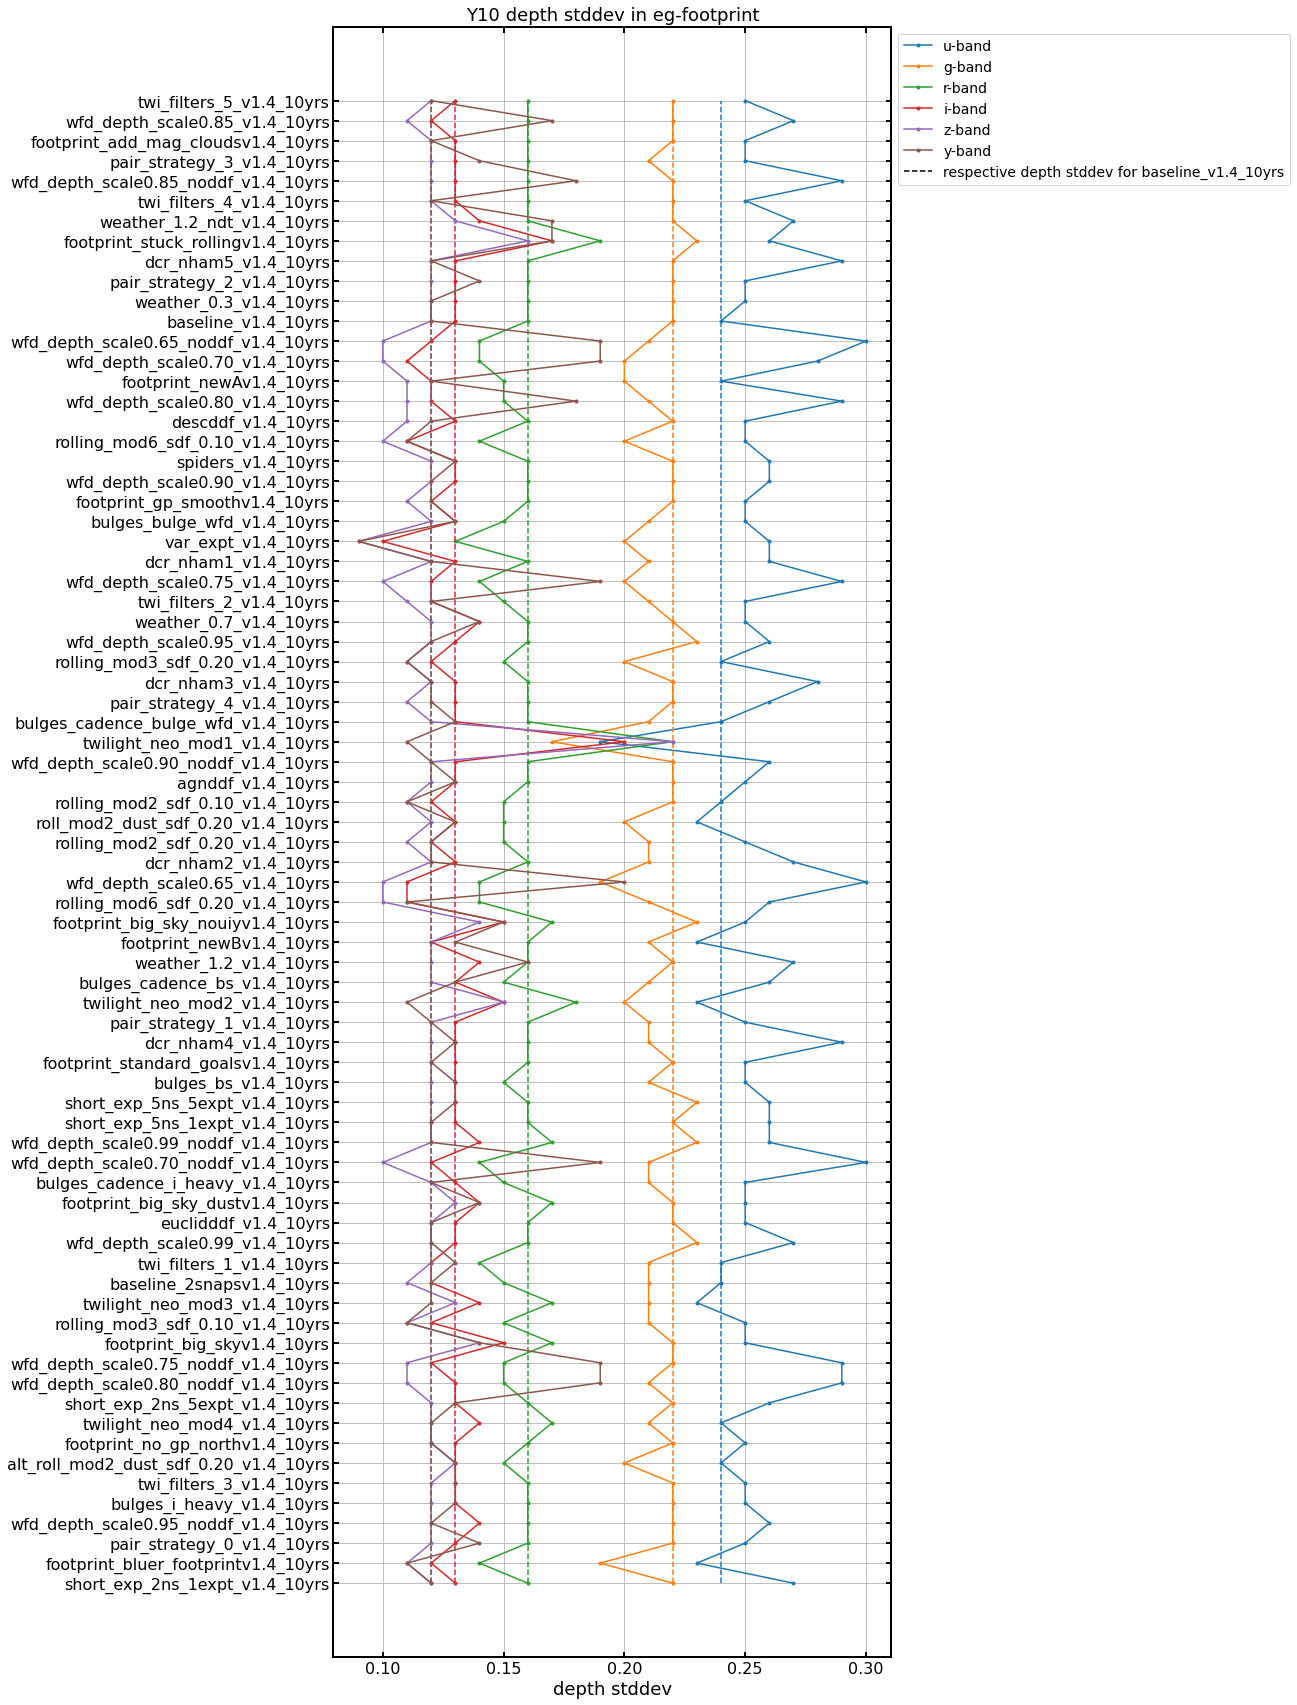

In [20]:
plt.clf()
for band in bands:
    band_key = '%s-band stddev in coadded dust-corrected depth in eg-footprint' % band
    p = plt.plot(data_to_consider[band_key].values, range(ndbs), '.-', label='%s-band' % band, )
    plt.plot( [ data_to_consider[band_key].values[baseline_ind] ] * ndbs, range(ndbs), '--', color=p[0].get_color(), )
    
plt.plot( [data_to_consider[band_key].values[baseline_ind]], [0], 'k--', label='respective depth stddev for baseline_v1.4_10yrs')

ax = plt.gca()
ax.set_yticks( range(ndbs) )
ax.set_yticklabels( data_to_consider['dbname'].values )

plt.xlabel('depth stddev')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Y10 depth stddev in eg-footprint')
plt.gcf().set_size_inches(10, 30 )
fname = 'plot_stddev-depths.png'
plt.savefig('%s/%s' % (outdir, fname), bbox_inches='tight', format='png')
print('## saved %s' % fname)
plt.show()

#### just for a sanity check: lets plot out the area values in each file; they should match.

In [21]:
data_to_consider = pd.DataFrame()
for i, band in enumerate( bands ):
    fname = [f for f in os.listdir(path) if f.__contains__('_%s-band_' % band) \
                                             and f.__contains__('_%s_' % yr_tag) \
                                             and f.__contains__('_%s_' % ilim_tag)
            ][0]
    print('reading in %s' % fname)
    data_ = pd.read_csv('%s/%s' % (path, fname))
    
    band_key = '%s-band eg-footprint area' % band
    if i == 0:
        data_to_consider['dbname'] = data_['dbname'].values
        data_to_consider['yr'] = [yr_tag] * len( data_['dbname'].values )
        
    else:
        # check to ensure the db order is the same
        if  (data_to_consider['dbname'] != data_['dbname'].values).any():
            raise ValueError('dbname order is different for %s-band vs. previous ones.' % band)
    
    data_to_consider[band_key] = data_['Area (deg2)'].values

reading in median-depth_u-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_g-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_r-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_i-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_z-band_eg-pixels_y10_limi25.9_nside256.csv
reading in median-depth_y-band_eg-pixels_y10_limi25.9_nside256.csv


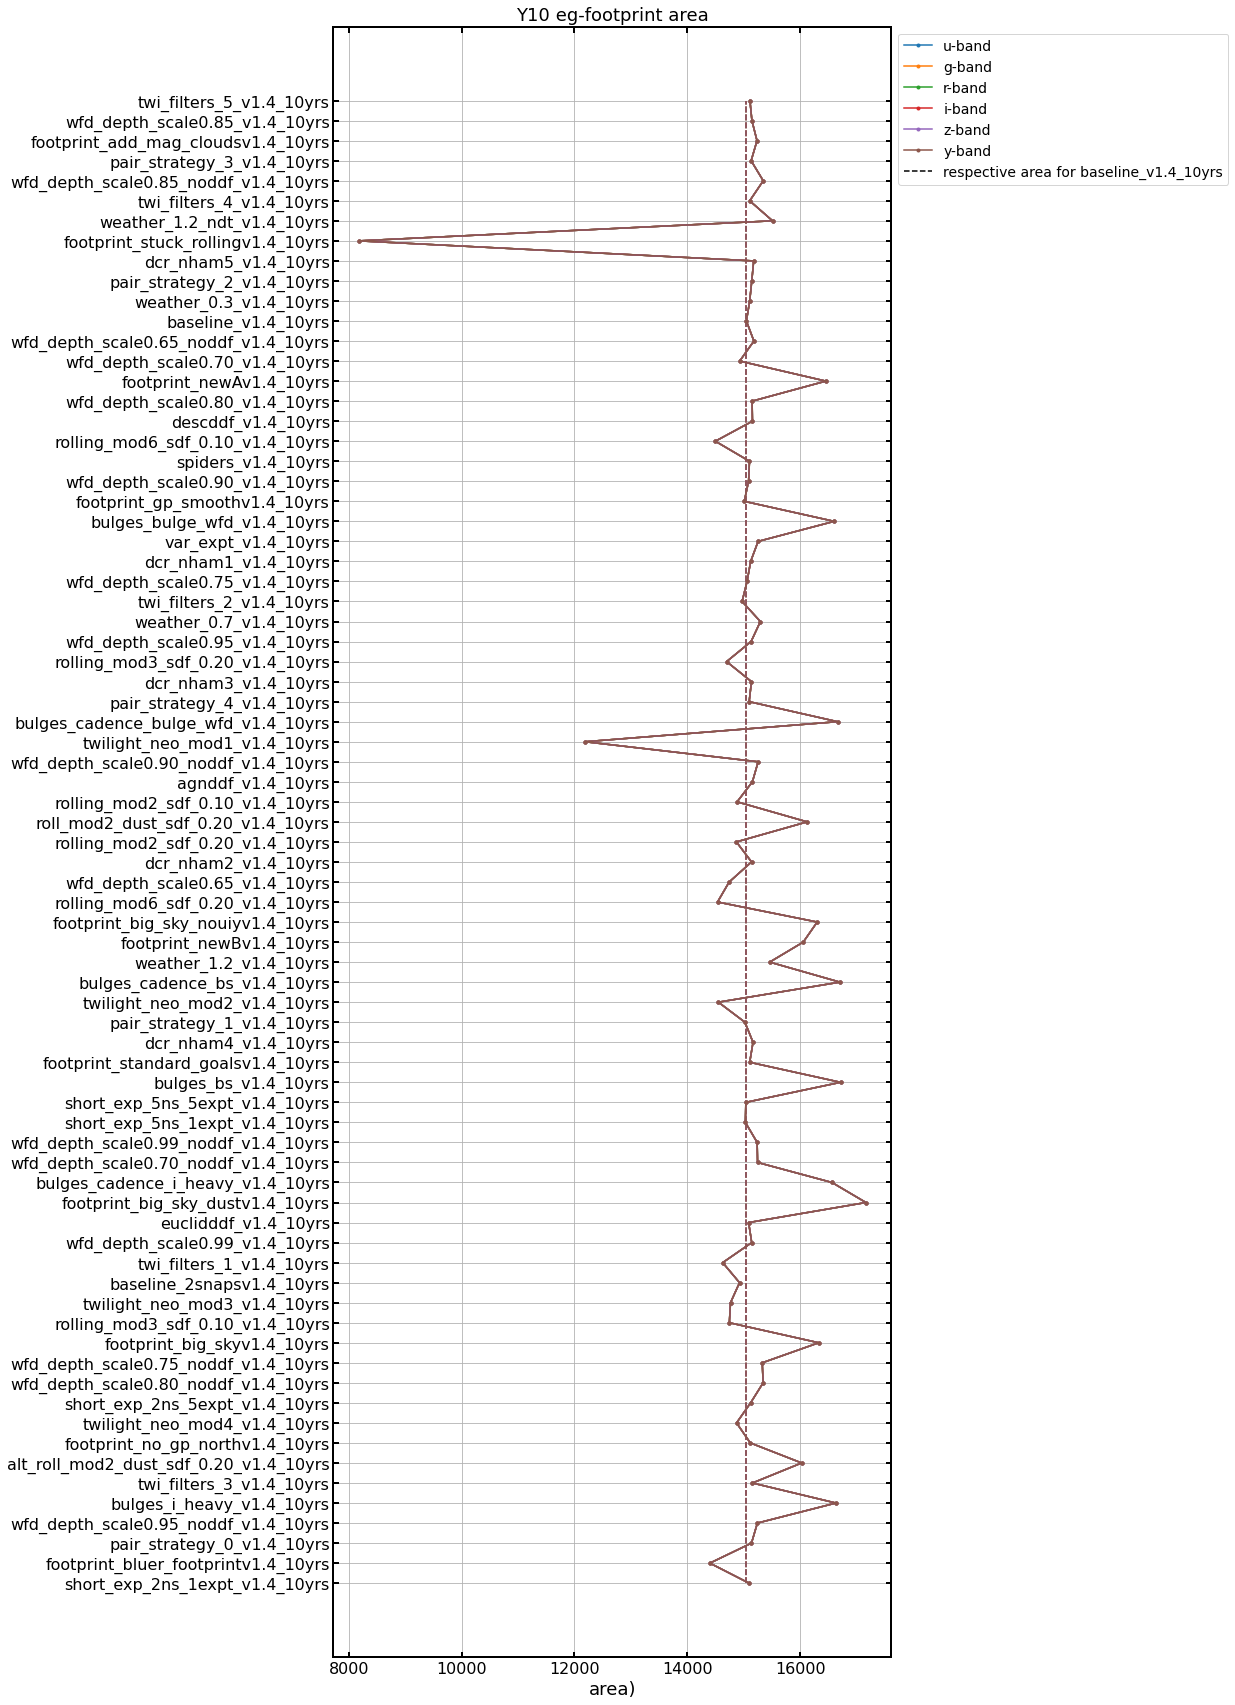

In [22]:
plt.clf()
for band in bands:
    band_key = '%s-band eg-footprint area' % band
    p = plt.plot(data_to_consider[band_key].values, range(ndbs), '.-', label='%s-band' % band, )
    plt.plot( [ data_to_consider[band_key].values[baseline_ind] ] * ndbs, range(ndbs), '--', color=p[0].get_color(), )
    
plt.plot( [data_to_consider[band_key].values[baseline_ind]], [0], 'k--', label='respective area for baseline_v1.4_10yrs')

ax = plt.gca()
ax.set_yticks( range(ndbs) )
ax.set_yticklabels( data_to_consider['dbname'].values )

plt.xlabel('area)')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Y10 eg-footprint area')
plt.gcf().set_size_inches(10, 30 )
#fname = 'plot_stddev-depths.png'
#plt.savefig('%s/%s' % (outdir, fname), bbox_inches='tight', format='png')
#print('## saved %s' % fname)
plt.show()

okay good. the area values in the files are the same as they should be.